In [87]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import KFold
from scipy.stats.mstats import zscore


# A. Explanatory Analysis

In [88]:
df_sales = pd.read_csv('sales_reciepts.csv')
df_sales

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N
49891,759,2019-04-29,11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,N
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N


In [89]:
df_sales.shape

(49894, 14)

In [90]:
df_product = pd.read_csv('product.csv')
df_product['product_category'] = df_product['product_category'].str.replace(' ','_')

df_product

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee_beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee_beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee_beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee_beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee_beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,15.00,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,Bursting with chocolate flavour,pump,0.04,0.80,Y,N,N
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,2 shots of Ouro Brasilerio and pure cane sugar...,6 oz,1.20,6.00,Y,N,Y
85,87,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,From Rio,1.5 oz,0.60,3.00,Y,N,N
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,Ouro promo,16 oz,0.42,2.10,Y,Y,N


In [91]:
df_product.shape

(88, 12)

In [92]:
merge = pd.merge( left = df_sales,  right = df_product, how="inner", on="product_id")
merge


,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N
1,249,2019-04-01,11:15:38,3,12,22,Y,1,1,52,1,2.50,2.50,N,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N
2,326,2019-04-01,12:05:31,3,12,659,N,1,1,52,2,5.00,2.50,N,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N
3,497,2019-04-01,16:49:38,3,12,407,Y,1,1,52,1,2.50,2.50,N,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N
4,541,2019-04-01,19:17:34,3,12,537,Y,1,1,52,2,5.00,2.50,N,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,1318,2019-04-24,09:31:54,8,42,8113,Y,7,1,11,1,8.95,8.95,N,Whole Bean/Teas,Loose_Tea,Herbal tea,Lemon Grass,You will think you are Thailand as you sip you...,.9 oz,7.16,8.95,Y,N,N
49890,659,2019-04-25,06:17:12,5,26,5778,N,7,1,11,1,8.95,8.95,N,Whole Bean/Teas,Loose_Tea,Herbal tea,Lemon Grass,You will think you are Thailand as you sip you...,.9 oz,7.16,8.95,Y,N,N
49891,722,2019-04-25,10:48:21,8,44,0,N,7,1,11,1,8.95,8.95,N,Whole Bean/Teas,Loose_Tea,Herbal tea,Lemon Grass,You will think you are Thailand as you sip you...,.9 oz,7.16,8.95,Y,N,N
49892,869,2019-04-25,08:54:27,8,42,8039,Y,7,1,11,1,8.95,8.95,N,Whole Bean/Teas,Loose_Tea,Herbal tea,Lemon Grass,You will think you are Thailand as you sip you...,.9 oz,7.16,8.95,Y,N,N


In [93]:
df2 = merge [['quantity', 'product_category', 'current_wholesale_price', 'current_retail_price', 'tax_exempt_yn']]
df2

,quantity,product_category,current_wholesale_price,current_retail_price,tax_exempt_yn
0,1,Tea,0.63,2.50,Y
1,1,Tea,0.63,2.50,Y
2,2,Tea,0.63,2.50,Y
3,1,Tea,0.63,2.50,Y
4,2,Tea,0.63,2.50,Y
...,...,...,...,...,...
49889,1,Loose_Tea,7.16,8.95,Y
49890,1,Loose_Tea,7.16,8.95,Y
49891,1,Loose_Tea,7.16,8.95,Y
49892,1,Loose_Tea,7.16,8.95,Y


In [94]:
product_category_dum = pd.get_dummies(df2['product_category'], prefix="product_category")
sum_df_11 = pd.concat([df2, product_category_dum], axis = 1)
sum_df_11 

,quantity,product_category,current_wholesale_price,current_retail_price,tax_exempt_yn,product_category_Bakery,product_category_Branded,product_category_Coffee,product_category_Coffee_beans,product_category_Drinking_Chocolate,product_category_Flavours,product_category_Loose_Tea,product_category_Packaged_Chocolate,product_category_Tea
0,1,Tea,0.63,2.50,Y,0,0,0,0,0,0,0,0,1
1,1,Tea,0.63,2.50,Y,0,0,0,0,0,0,0,0,1
2,2,Tea,0.63,2.50,Y,0,0,0,0,0,0,0,0,1
3,1,Tea,0.63,2.50,Y,0,0,0,0,0,0,0,0,1
4,2,Tea,0.63,2.50,Y,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,1,Loose_Tea,7.16,8.95,Y,0,0,0,0,0,0,1,0,0
49890,1,Loose_Tea,7.16,8.95,Y,0,0,0,0,0,0,1,0,0
49891,1,Loose_Tea,7.16,8.95,Y,0,0,0,0,0,0,1,0,0
49892,1,Loose_Tea,7.16,8.95,Y,0,0,0,0,0,0,1,0,0


In [95]:
tax_exempt_yn_dum = pd.get_dummies(sum_df_11['tax_exempt_yn'], prefix="tax_exempt_yn")
sum_df_12 = pd.concat([sum_df_11, tax_exempt_yn_dum], axis = 1)
sum_df = sum_df_12.dropna()
sum_df

,quantity,product_category,current_wholesale_price,current_retail_price,tax_exempt_yn,product_category_Bakery,product_category_Branded,product_category_Coffee,product_category_Coffee_beans,product_category_Drinking_Chocolate,product_category_Flavours,product_category_Loose_Tea,product_category_Packaged_Chocolate,product_category_Tea,tax_exempt_yn_N,tax_exempt_yn_Y
0,1,Tea,0.63,2.50,Y,0,0,0,0,0,0,0,0,1,0,1
1,1,Tea,0.63,2.50,Y,0,0,0,0,0,0,0,0,1,0,1
2,2,Tea,0.63,2.50,Y,0,0,0,0,0,0,0,0,1,0,1
3,1,Tea,0.63,2.50,Y,0,0,0,0,0,0,0,0,1,0,1
4,2,Tea,0.63,2.50,Y,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,1,Loose_Tea,7.16,8.95,Y,0,0,0,0,0,0,1,0,0,0,1
49890,1,Loose_Tea,7.16,8.95,Y,0,0,0,0,0,0,1,0,0,0,1
49891,1,Loose_Tea,7.16,8.95,Y,0,0,0,0,0,0,1,0,0,0,1
49892,1,Loose_Tea,7.16,8.95,Y,0,0,0,0,0,0,1,0,0,0,1


In [96]:
sum_df.corr()

,quantity,current_wholesale_price,current_retail_price,product_category_Bakery,product_category_Branded,product_category_Coffee,product_category_Coffee_beans,product_category_Drinking_Chocolate,product_category_Flavours,product_category_Loose_Tea,product_category_Packaged_Chocolate,product_category_Tea,tax_exempt_yn_N,tax_exempt_yn_Y
quantity,1.000000,-0.166877,-0.119205,-0.327312,-0.051407,0.133013,-0.078121,0.045862,0.041442,-0.072637,-0.044461,0.114948,-0.332972,0.332972
current_wholesale_price,-0.166877,1.000000,0.919346,0.183861,0.139994,-0.274519,0.769205,0.230029,-0.129871,0.247840,0.150422,-0.194530,0.208360,-0.208360
current_retail_price,-0.119205,0.919346,1.000000,0.025928,0.382799,-0.106122,0.723073,0.081930,-0.210377,0.198229,0.120052,-0.140678,0.099042,-0.099042
product_category_Bakery,-0.327312,0.183861,0.025928,1.000000,-0.029815,-0.342471,-0.046310,-0.122488,-0.092192,-0.038204,-0.023385,-0.280068,0.981437,-0.981437
product_category_Branded,-0.051407,0.139994,0.382799,-0.029815,1.000000,-0.056682,-0.007665,-0.020273,-0.015259,-0.006323,-0.003870,-0.046354,0.162437,-0.162437
product_category_Coffee,0.133013,-0.274519,-0.106122,-0.342471,-0.056682,1.000000,-0.088040,-0.232865,-0.175268,-0.072630,-0.044457,-0.532445,-0.348948,0.348948
product_category_Coffee_beans,-0.078121,0.769205,0.723073,-0.046310,-0.007665,-0.088040,1.000000,-0.031488,-0.023700,-0.009821,-0.006012,-0.071998,-0.047185,0.047185
product_category_Drinking_Chocolate,0.045862,0.230029,0.081930,-0.122488,-0.020273,-0.232865,-0.031488,1.000000,-0.062686,-0.025977,-0.015900,-0.190434,-0.124805,0.124805
product_category_Flavours,0.041442,-0.129871,-0.210377,-0.092192,-0.015259,-0.175268,-0.023700,-0.062686,1.000000,-0.019552,-0.011968,-0.143332,-0.093935,0.093935
product_category_Loose_Tea,-0.072637,0.247840,0.198229,-0.038204,-0.006323,-0.072630,-0.009821,-0.025977,-0.019552,1.000000,-0.004959,-0.059396,-0.038926,0.038926


<AxesSubplot:xlabel='product_category'>

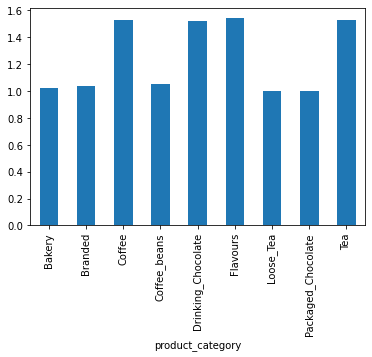

In [97]:
import matplotlib.pyplot as plt

A=sum_df.groupby(['product_category'])['quantity'].mean()
A.plot.bar()

<AxesSubplot:xlabel='tax_exempt_yn'>

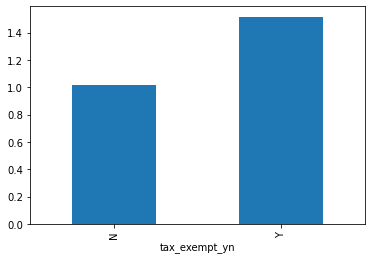

In [98]:
A=sum_df.groupby(['tax_exempt_yn'])['quantity'].mean()
A.plot.bar()

<AxesSubplot:xlabel='current_retail_price'>

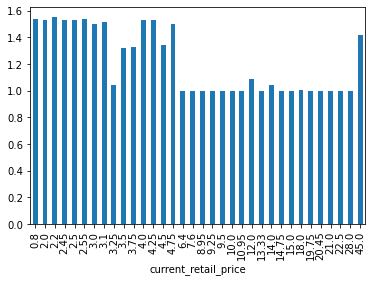

In [99]:
A=sum_df.groupby(['current_retail_price'])['quantity'].mean()
A.plot.bar()

# B(1). OLS

In [100]:
sum_df['current_retail_price'] = sum_df['current_retail_price'].astype(np.int64)
print (sum_df['current_retail_price'])

0        2
1        2
2        2
3        2
4        2
        ..
49889    8
49890    8
49891    8
49892    8
49893    8
Name: current_retail_price, Length: 49894, dtype: int64


In [101]:
y=sum_df.quantity
x=sum_df[['current_retail_price','product_category_Bakery', 'product_category_Branded',
      'product_category_Coffee_beans','product_category_Drinking_Chocolate','product_category_Flavours',
      'product_category_Loose_Tea','product_category_Packaged_Chocolate','product_category_Tea','tax_exempt_yn_Y']]

m=sm.OLS(y, x).fit() 
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               quantity   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     831.4
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:15:35   Log-Likelihood:                -36845.
No. Observations:               49894   AIC:                         7.371e+04
Df Residuals:                   49884   BIC:                         7.380e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
current_retail_price                    0.0073      0.002      4.058      0.000       0.004       0.011
product_category_Bakery                 0.9968      0.008    123.844      0.000       0.981       1.013
product_category_Branded                0.9091      0.046     19.833      0.000       0.819       0.999
product_category_Coffee_beans          -0.6113      0.039    -15.663      0.000      -0.688      -0.535
product_category_Drinking_Chocolate    -0.0088      0.009     -0.973      0.330      -0.027       0.009
product_category_Flavours               0.0343      0.012      2.786      0.005       0.010       0.059
product_category_Loose_Tea             -0.5696      0.028    -20.673      0.000      -0.624      -0.516
product_category_Packaged_Chocolate    -0.5717      0.043    -13.368      0.000      -0.656      -0.488
product_category_Tea                    0.0066      0.005      1.200      0.230      -0.004       0.017
tax_exempt_yn_Y                         1.5075      0.006    244.704      0.000       1.495       1.520
==============================================================================
Omnibus:                     5560.554   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14271.726
Skew:                           0.642   Prob(JB):                         0.00
Kurtosis:                       5.284   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# B(2). KNN

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
sum_df.quantity.value_counts()

1    29170
2    19616
3     1094
4        9
8        4
6        1
Name: quantity, dtype: int64

In [37]:
y = sum_df.quantity
sum_df.columns

Index(['quantity', 'product_category', 'current_wholesale_price',
       'current_retail_price', 'tax_exempt_yn', 'product_category_Bakery',
       'product_category_Branded', 'product_category_Coffee',
       'product_category_Coffee_beans', 'product_category_Drinking_Chocolate',
       'product_category_Flavours', 'product_category_Loose_Tea',
       'product_category_Packaged_Chocolate', 'product_category_Tea',
       'tax_exempt_yn_N', 'tax_exempt_yn_Y'],
      dtype='object')

In [38]:
x1=sum_df[['current_retail_price']]  # continuous variable
x2=sum_df[['product_category_Bakery', 'product_category_Branded',
      'product_category_Coffee_beans','product_category_Drinking_Chocolate','product_category_Flavours',
      'product_category_Loose_Tea','product_category_Packaged_Chocolate','product_category_Tea','tax_exempt_yn_Y']].values  # dummy as array
x1=preprocessing.StandardScaler().fit_transform(x1)  # Standardization

x=np.concatenate((x1, x2), axis=1)  # join array
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=10)

In [39]:
m = KNeighborsClassifier(n_neighbors=4).fit(xtrain, ytrain)
ypred = m.predict(xtest)

print("Train accuracy: ", metrics.accuracy_score(ytrain, m.predict(xtrain)))
print("Test accuracy: ", metrics.accuracy_score(ytest, ypred))
# print("Test accuracy: ", m.score(xtest, ytest))  # alternative

Train accuracy:  0.5807322287546767
Test accuracy:  0.577922077922078


In [40]:
accuracy=[]
for k in range(1,11):
    m=KNeighborsClassifier(n_neighbors=k).fit(xtrain, ytrain)
    accuracy.append(m.score(xtest, ytest))  # mean accuracy
    
accuracy

[0.5804874138207472,
 0.5809684143017476,
 0.5792047458714126,
 0.577922077922078,
 0.5774410774410774,
 0.5817700817700817,
 0.5804874138207472,
 0.5809684143017476,
 0.577922077922078,
 0.5812089145422479]

Text(0.5, 0, 'Number of Neighbors (K)')

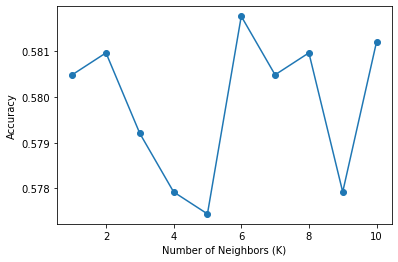

In [41]:
# Plot model accuracy for k=1~10

plt.plot(range(1,11), accuracy, marker="o")
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')

### Optimal K value: 2 & 6

In [ ]:
m = KNeighborsClassifier(n_neighbors=2).fit(xtrain, ytrain)
ypred = m.predict(xtest)

print("Train accuracy: ", metrics.accuracy_score(ytrain, m.predict(xtrain)))
print("Test accuracy: ", metrics.accuracy_score(ytest, ypred))

In [ ]:
m = KNeighborsClassifier(n_neighbors=6).fit(xtrain, ytrain)
ypred = m.predict(xtest)

print("Train accuracy: ", metrics.accuracy_score(ytrain, m.predict(xtrain)))
print("Test accuracy: ", metrics.accuracy_score(ytest, ypred))

# C. OLS With Interaction

In [42]:
df_cust.head()
df_cust = df_cust[df_cust.gender != 'N']
df_cust.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951


In [43]:
OLSInt = pd.merge( left = df_sales,  right = df_cust, how="inner", on="customer_id")
OLSInt

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983
1,1539,2019-04-01,16:49:47,3,12,558,N,1,1,29,1,2.50,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983
2,2188,2019-04-01,15:01:02,3,17,558,Y,1,1,48,2,5.00,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983
3,78,2019-04-02,15:24:16,3,17,558,N,1,1,60,1,3.75,3.75,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983
4,14,2019-04-03,19:45:56,3,12,558,N,1,1,32,1,3.00,3.00,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19068,291,2019-04-28,11:53:11,5,26,5742,Y,1,5,70,1,3.25,3.25,N,5,Marcia,Cleo@commodo.org,2017-07-13,901-450-3862,1962-02-22,F,1962
19069,1157,2019-04-26,10:05:20,5,28,5551,Y,1,1,42,1,2.50,2.50,N,5,Hilary,Quamar@aliquam.com,2018-02-28,083-680-1202,1976-04-27,F,1976
19070,1157,2019-04-26,10:05:20,5,28,5551,Y,1,5,72,1,3.25,3.25,N,5,Hilary,Quamar@aliquam.com,2018-02-28,083-680-1202,1976-04-27,F,1976
19071,309,2019-04-28,13:10:43,5,30,5551,N,1,1,23,2,5.00,2.50,N,5,Hilary,Quamar@aliquam.com,2018-02-28,083-680-1202,1976-04-27,F,1976


In [44]:
OLSInt_1 = merge.groupby(['customer_id', 'transaction_date']).agg({'quantity': 'sum'})
OLSInt_1

quantity
customer_id transaction_date          
0           2019-04-03               2
            2019-04-04               2
            2019-04-07            1206
            2019-04-08            1350
            2019-04-09            1499
...                                ...
8501        2019-04-01               2
            2019-04-02               1
            2019-04-04               3
            2019-04-27               2
            2019-04-28               1

[16359 rows x 1 columns]

In [45]:
OLSInt_2 = pd.merge( left = OLSInt_1,  right = OLSInt, how="inner", on="customer_id")
OLSInt_2

,customer_id,quantity_x,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,instore_yn,order,line_item_id,product_id,quantity_y,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,1,1783,2019-04-02,15:14:47,3,12,Y,1,1,32,1,3.00,3.00,N,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,1,1,235,2019-04-03,15:01:44,3,17,N,1,1,37,1,3.00,3.00,N,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
2,1,1,662,2019-04-15,08:53:26,3,14,N,1,1,28,2,4.00,2.00,N,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
3,1,1,662,2019-04-19,08:53:26,3,14,N,1,1,28,2,4.00,2.00,N,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
4,1,1,2112,2019-04-26,09:59:54,3,14,N,1,1,58,1,3.50,3.50,N,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160248,8501,1,632,2019-04-02,18:50:13,8,15,N,1,1,61,1,4.75,4.75,N,8,Moana,Herrod@ultrices.gov,2018-07-06,241-906-4009,1966-08-27,F,1966
160249,8501,1,543,2019-04-04,10:18:58,8,15,Y,1,1,51,1,3.00,3.00,N,8,Moana,Herrod@ultrices.gov,2018-07-06,241-906-4009,1966-08-27,F,1966
160250,8501,1,2437,2019-04-04,11:07:21,8,15,Y,1,1,45,2,6.00,3.00,N,8,Moana,Herrod@ultrices.gov,2018-07-06,241-906-4009,1966-08-27,F,1966
160251,8501,1,53,2019-04-27,10:55:39,8,45,N,1,1,43,2,6.00,3.00,N,8,Moana,Herrod@ultrices.gov,2018-07-06,241-906-4009,1966-08-27,F,1966


In [47]:
m = sm.OLS.from_formula('quantity_x ~ gender*birth_year', OLSInt_2).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             quantity_x   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     41.86
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           4.96e-27
Time:                        23:05:36   Log-Likelihood:            -2.7195e+05
No. Observations:              160253   AIC:                         5.439e+05
Df Residuals:                  160249   BIC:                         5.440e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.0323      0.578      3.513      0.000       0.898       3.166
gender[T.M]                7.2231      0.884      8.169      0.000       5.490       8.956
birth_year                 0.0001      0.000      0.416      0.678      -0.000       0.001
gender[T.M]:birth_year    -0.0037      0.000     -8.202      0.000      -0.005      -0.003
==============================================================================
Omnibus:                    55324.987   Durbin-Watson:                   0.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           215740.584
Skew:                           1.701   Prob(JB):                         0.00
Kurtosis:                       7.553   Cond. No.                     6.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# D.  Price Elasticity

In [58]:
import statsmodels.formula.api as sm

In [49]:
df_sales.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [50]:
df_sales.groupby('product_id')['quantity'].sum()

product_id
1       70
2       65
3       53
4       47
5       50
      ... 
81      79
82      75
83     101
84     875
87    1107
Name: quantity, Length: 80, dtype: int64

In [51]:
df_sales.groupby('product_id')['unit_price'].mean()

product_id
1     18.000000
2     18.000000
3     14.750000
4     20.450000
5     15.000000
        ...    
81    27.873418
82    12.318841
83    14.371134
84     0.800000
87     2.694834
Name: unit_price, Length: 80, dtype: float64

In [52]:
df_sales.groupby('instore_yn')['quantity'].mean()

instore_yn
     1.452381
N    1.442011
Y    1.434299
Name: quantity, dtype: float64

In [53]:
df_sales[['unit_price','quantity']].corr()

,unit_price,quantity
unit_price,1.000000,-0.119205
quantity,-0.119205,1.000000


In [54]:
# Estimate own price elasticity

# Create log
df_sales['lnunit_price']=np.log(df_sales.unit_price)
df_sales['lnquantity']=np.log(df_sales.quantity)
df_sales.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,lnunit_price,lnquantity
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N,0.916291,0.000000
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N,1.252763,0.693147
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N,0.916291,0.693147
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N,0.916291,0.693147
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N,0.896088,0.000000


In [55]:
from math import log

for y in ['unit_price','quantity']:
    df_sales['ln'+y] = df_sales[y].apply(lambda x: log(x))
df_sales.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,lnunit_price,lnquantity
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N,0.916291,0.000000
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N,1.252763,0.693147
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N,0.916291,0.693147
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N,0.916291,0.693147
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N,0.896088,0.000000


In [59]:
m1 = sm.ols(formula='lnquantity ~ lnunit_price', data=df_sales).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:             lnquantity   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1189.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          1.85e-257
Time:                        23:09:26   Log-Likelihood:                -18900.
No. Observations:               49894   AIC:                         3.780e+04
Df Residuals:                   49892   BIC:                         3.782e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4338      0.004    101.586   

# E.         Decision Tree, Logistic     Regression, SVM and Random Forest

### Cleaning and Merging the Data for Forecasting and Model Evaluation: Decision Tree, Logistic Regression, Random Forest and SVM 


In [71]:
df_sales = pd.read_csv('sales_reciepts.csv')
df_sales.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [72]:
df_cust = pd.read_csv('customer.csv')
df_cust.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951


In [73]:
df_product = pd.read_csv('product.csv')
df_product['product_category'] = df_product['product_category'].str.replace(' ','_')

In [76]:
df_gen = pd.read_csv('generations.csv')

df_gen.head()

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers


In [77]:
Table_1 = pd.merge( left = df_sales,  right = df_cust, how="inner", on="customer_id")
Table_1

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983
1,1539,2019-04-01,16:49:47,3,12,558,N,1,1,29,1,2.50,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983
2,2188,2019-04-01,15:01:02,3,17,558,Y,1,1,48,2,5.00,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983
3,78,2019-04-02,15:24:16,3,17,558,N,1,1,60,1,3.75,3.75,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983
4,14,2019-04-03,19:45:56,3,12,558,N,1,1,32,1,3.00,3.00,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24847,1908,2019-04-26,13:48:46,5,27,5759,Y,1,5,76,1,3.50,3.50,N,5,Dalton,Brennan@nulla.us,2017-05-01,472-067-3446,1983-04-08,N,1983
24848,1157,2019-04-26,10:05:20,5,28,5551,Y,1,1,42,1,2.50,2.50,N,5,Hilary,Quamar@aliquam.com,2018-02-28,083-680-1202,1976-04-27,F,1976
24849,1157,2019-04-26,10:05:20,5,28,5551,Y,1,5,72,1,3.25,3.25,N,5,Hilary,Quamar@aliquam.com,2018-02-28,083-680-1202,1976-04-27,F,1976
24850,309,2019-04-28,13:10:43,5,30,5551,N,1,1,23,2,5.00,2.50,N,5,Hilary,Quamar@aliquam.com,2018-02-28,083-680-1202,1976-04-27,F,1976


In [10]:
Table_2 = pd.merge( left = Table_1,  right = df_product, how="inner", on="product_id")
Table_2

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,...,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,...,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N
1,229,2019-04-17,10:43:54,3,16,38,Y,1,1,52,...,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N
2,390,2019-04-13,18:01:49,3,12,128,Y,1,1,52,...,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N
3,165,2019-04-06,16:27:42,3,17,599,Y,1,1,52,...,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N
4,2621,2019-04-24,11:27:44,3,14,152,Y,1,1,52,...,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24847,194,2019-04-12,10:21:25,5,28,5455,N,7,1,8,...,Coffee_beans,Premium Beans,Civet Cat,"The most expensive coffee in the world, the ca...",.5 lb,36.00,45.00,Y,N,N
24848,316,2019-04-12,15:16:12,5,29,5688,Y,7,1,8,...,Coffee_beans,Premium Beans,Civet Cat,"The most expensive coffee in the world, the ca...",.5 lb,36.00,45.00,Y,N,N
24849,386,2019-04-09,12:04:39,3,6,653,Y,1,3,8,...,Coffee_beans,Premium Beans,Civet Cat,"The most expensive coffee in the world, the ca...",.5 lb,36.00,45.00,Y,N,N
24850,317,2019-04-09,16:23:09,3,6,45,N,2,3,8,...,Coffee_beans,Premium Beans,Civet Cat,"The most expensive coffee in the world, the ca...",.5 lb,36.00,45.00,Y,N,N


In [11]:
Table_3 = pd.merge( left = Table_2,  right = df_gen, how="inner", on="birth_year")
pd.set_option('display.max_columns', None)
Table_3.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,generation
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.5,2.5,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N,Older Millennials
1,1693,2019-04-05,11:13:45,3,12,194,N,1,1,52,1,2.5,2.5,N,3,Adrian Joyce,Fritz@turpis.net,2018-06-20,048-023-5482,1983-03-28,M,1983,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N,Older Millennials
2,1617,2019-04-22,11:41:17,3,16,195,N,1,1,52,1,2.5,2.5,N,3,Kennan Davidson,Nigel@nibh.gov,2018-06-23,560-611-7069,1983-05-30,M,1983,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N,Older Millennials
3,1478,2019-04-01,13:42:58,5,26,5243,N,1,1,52,1,2.5,2.5,N,5,Jordan,Jonah@egestas.us,2017-05-13,686-827-2302,1983-07-28,N,1983,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N,Older Millennials
4,1392,2019-04-06,09:23:38,8,42,8186,Y,1,1,52,2,5.0,2.5,N,8,Blaze,Quamar@Etiam.edu,2018-12-03,083-801-0767,1983-03-03,M,1983,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N,Older Millennials


In [78]:
Table_4 = Table_3.drop(["sales_outlet_id","product_id","transaction_id","transaction_date","transaction_time","staff_id","customer_id", "order", "line_item_id", "line_item_amount", "promo_item_yn", "customer_first-name", "customer_email", "customer_since", "loyalty_card_number", "birthdate", "product_group","product_type","product","product_description", "unit_of_measure","current_wholesale_price", "current_retail_price", "promo_yn", "new_product_yn"], axis = 1)
Table_4

,instore_yn,quantity,unit_price,home_store,gender,birth_year,product_category,tax_exempt_yn,generation
0,N,1,2.50,3,F,1983,Tea,Y,Older Millennials
1,N,1,2.50,3,M,1983,Tea,Y,Older Millennials
2,N,1,2.50,3,M,1983,Tea,Y,Older Millennials
3,N,1,2.50,5,N,1983,Tea,Y,Older Millennials
4,Y,2,2.50,8,M,1983,Tea,Y,Older Millennials
...,...,...,...,...,...,...,...,...,...
24847,N,2,3.00,8,M,1959,Coffee,Y,Baby Boomers
24848,N,2,3.00,8,M,1959,Coffee,Y,Baby Boomers
24849,Y,1,2.10,5,M,1959,Coffee,Y,Baby Boomers
24850,Y,1,8.95,3,N,1959,Loose_Tea,Y,Baby Boomers


In [79]:
Table_4['generation'] = Table_4['generation'].str.replace(' ','_')
Table_4['product_category'] = Table_4['product_category'].str.replace(' ','_')
Table_4 = Table_4[Table_4.gender != 'N'] 
Table_4

,instore_yn,quantity,unit_price,home_store,gender,birth_year,product_category,tax_exempt_yn,generation
0,N,1,2.5,3,F,1983,Tea,Y,Older_Millennials
1,N,1,2.5,3,M,1983,Tea,Y,Older_Millennials
2,N,1,2.5,3,M,1983,Tea,Y,Older_Millennials
4,Y,2,2.5,8,M,1983,Tea,Y,Older_Millennials
8,Y,1,2.5,5,M,1983,Tea,Y,Older_Millennials
...,...,...,...,...,...,...,...,...,...
24845,N,1,3.0,8,M,1959,Coffee,Y,Baby_Boomers
24846,N,1,3.0,8,F,1959,Coffee,Y,Baby_Boomers
24847,N,2,3.0,8,M,1959,Coffee,Y,Baby_Boomers
24848,N,2,3.0,8,M,1959,Coffee,Y,Baby_Boomers


In [80]:
### Taking Dummies

In [81]:
home_store_dum = pd.get_dummies(Table_4['home_store'], prefix="home_store_dum")
Table_4 = pd.concat([Table_4, home_store_dum], axis = 1 )

In [82]:
gender_dum = pd.get_dummies(Table_4['gender'], prefix="gender")
Table_4 = pd.concat([Table_4, gender_dum ], axis = 1 )

In [83]:
product_category_dum = pd.get_dummies(Table_4['product_category'], prefix="product_category")
Table_4 = pd.concat([Table_4, product_category_dum ], axis = 1 )

In [84]:
tax_exempt_yn_dum = pd.get_dummies(Table_4['tax_exempt_yn'], prefix="tax_exempt_yn")
Table_4 = pd.concat([Table_4, tax_exempt_yn_dum ], axis = 1 )

In [85]:
generation_dum = pd.get_dummies(Table_4['generation'], prefix="generation")
Table_4 = pd.concat([Table_4, generation_dum ], axis = 1 )

In [86]:
# Remove empty values
Table_4 = Table_4[Table_4.instore_yn.isin([' ']) == False]

Table_4

,instore_yn,quantity,unit_price,home_store,gender,birth_year,product_category,tax_exempt_yn,generation,home_store_dum_3,home_store_dum_5,home_store_dum_8,gender_F,gender_M,product_category_Bakery,product_category_Branded,product_category_Coffee,product_category_Coffee_beans,product_category_Drinking_Chocolate,product_category_Flavours,product_category_Loose_Tea,product_category_Packaged_Chocolate,product_category_Tea,tax_exempt_yn_N,tax_exempt_yn_Y,generation_Baby_Boomers,generation_Gen_X,generation_Gen_Z,generation_Older_Millennials,generation_Younger_Millennials
0,N,1,2.5,3,F,1983,Tea,Y,Older_Millennials,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1,N,1,2.5,3,M,1983,Tea,Y,Older_Millennials,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
2,N,1,2.5,3,M,1983,Tea,Y,Older_Millennials,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,Y,2,2.5,8,M,1983,Tea,Y,Older_Millennials,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
8,Y,1,2.5,5,M,1983,Tea,Y,Older_Millennials,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,N,1,3.0,8,M,1959,Coffee,Y,Baby_Boomers,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
24846,N,1,3.0,8,F,1959,Coffee,Y,Baby_Boomers,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
24847,N,2,3.0,8,M,1959,Coffee,Y,Baby_Boomers,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
24848,N,2,3.0,8,M,1959,Coffee,Y,Baby_Boomers,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0


In [87]:
Table_4_training, Table_4_test = train_test_split(Table_4, test_size = 0.30, random_state = 536, 
                                                  stratify = Table_4['instore_yn'])

In [88]:
training_X = Table_4_training.drop(['instore_yn', 'gender','home_store', 'product_category', 'generation', 'tax_exempt_yn'], axis=1)
training_Y = Table_4_training['instore_yn']

test_X = Table_4_test.drop(['instore_yn', 'gender','home_store', 'product_category', 'generation', 'tax_exempt_yn'], axis=1)
test_Y = Table_4_test['instore_yn']

In [89]:
training_Y = training_Y.str.replace('Y','1')
training_Y = training_Y.str.replace('N','0')
training_Y = training_Y.astype(int)

test_Y = test_Y.str.replace('Y','1')
test_Y = test_Y.str.replace('N','0')
test_Y = test_Y.astype(int)

In [90]:
Table_4['instore_yn'].unique()

array(['N', 'Y'], dtype=object)

In [91]:
Table_4

,instore_yn,quantity,unit_price,home_store,gender,birth_year,product_category,tax_exempt_yn,generation,home_store_dum_3,home_store_dum_5,home_store_dum_8,gender_F,gender_M,product_category_Bakery,product_category_Branded,product_category_Coffee,product_category_Coffee_beans,product_category_Drinking_Chocolate,product_category_Flavours,product_category_Loose_Tea,product_category_Packaged_Chocolate,product_category_Tea,tax_exempt_yn_N,tax_exempt_yn_Y,generation_Baby_Boomers,generation_Gen_X,generation_Gen_Z,generation_Older_Millennials,generation_Younger_Millennials
0,N,1,2.5,3,F,1983,Tea,Y,Older_Millennials,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1,N,1,2.5,3,M,1983,Tea,Y,Older_Millennials,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
2,N,1,2.5,3,M,1983,Tea,Y,Older_Millennials,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,Y,2,2.5,8,M,1983,Tea,Y,Older_Millennials,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
8,Y,1,2.5,5,M,1983,Tea,Y,Older_Millennials,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,N,1,3.0,8,M,1959,Coffee,Y,Baby_Boomers,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
24846,N,1,3.0,8,F,1959,Coffee,Y,Baby_Boomers,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
24847,N,2,3.0,8,M,1959,Coffee,Y,Baby_Boomers,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
24848,N,2,3.0,8,M,1959,Coffee,Y,Baby_Boomers,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0


## a. Decision Tree

In [92]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [93]:
TreeClassifier = DecisionTreeClassifier(criterion = 'entropy',  max_depth = 3)

In [94]:
TreeClassifier.fit(training_X, training_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [95]:
TreeClassifier.fit(training_X, training_Y)
prediction = TreeClassifier.predict(training_X)
accuracyScore_training = accuracy_score(training_Y, prediction) 

In [96]:
accuracyScore_training

0.5087060942659862

In [97]:
prediction = TreeClassifier.predict(test_X)
accuracyScore_test = accuracy_score(test_Y, prediction)

In [98]:
accuracyScore_test

0.5093678865347575

In [99]:
Table_4.columns

Index(['instore_yn', 'quantity', 'unit_price', 'home_store', 'gender',
       'birth_year', 'product_category', 'tax_exempt_yn', 'generation',
       'home_store_dum_3', 'home_store_dum_5', 'home_store_dum_8', 'gender_F',
       'gender_M', 'product_category_Bakery', 'product_category_Branded',
       'product_category_Coffee', 'product_category_Coffee_beans',
       'product_category_Drinking_Chocolate', 'product_category_Flavours',
       'product_category_Loose_Tea', 'product_category_Packaged_Chocolate',
       'product_category_Tea', 'tax_exempt_yn_N', 'tax_exempt_yn_Y',
       'generation_Baby_Boomers', 'generation_Gen_X', 'generation_Gen_Z',
       'generation_Older_Millennials', 'generation_Younger_Millennials'],
      dtype='object')

In [100]:
featureNames=['quantity', 'unit_price',
       'birth_year',
       'home_store_dum_3', 'home_store_dum_5', 'home_store_dum_8', 'gender_F',
       'gender_M', 'product_category_Bakery', 'product_category_Branded',
       'product_category_Coffee', 'product_category_Coffee_beans',
       'product_category_Drinking_Chocolate', 'product_category_Flavours',
       'product_category_Loose_Tea', 'product_category_Packaged_Chocolate',
       'product_category_Tea', 'tax_exempt_yn_N', 'tax_exempt_yn_Y',
       'generation_Baby_Boomers', 'generation_Gen_X', 'generation_Gen_Z',
       'generation_Older_Millennials', 'generation_Younger_Millennials']
classNames =["N","Y"]

In [254]:
for i in range(1,10):
    TreeClassifier=tree.DecisionTreeClassifier(criterion="entropy",max_depth=i)
    TreeClassifier.fit(training_X, training_Y)

    prediction_training = TreeClassifier.predict(training_X)
    accuracyScore = accuracy_score(training_Y, prediction_training)
    print("The trained tree with depth "+str(i)+" has an accuracy score on the TRAIN set of "+str(accuracyScore)+"\n")
    
    
    prediction_test = TreeClassifier.predict(test_X)
    accuracyScore_test = accuracy_score(test_Y, prediction_test)
    print("The trained tree with depth "+str(i)+" has an accuracy score on the TEST set of "+str(accuracyScore_test)+"\n")

The trained tree with depth 1 has an accuracy score on the TRAIN set of 0.5075052536775743

The trained tree with depth 1 has an accuracy score on the TEST set of 0.5135703029241814

The trained tree with depth 2 has an accuracy score on the TRAIN set of 0.5081056739717802

The trained tree with depth 2 has an accuracy score on the TEST set of 0.5088425844860794

The trained tree with depth 3 has an accuracy score on the TRAIN set of 0.5087060942659862

The trained tree with depth 3 has an accuracy score on the TEST set of 0.5093678865347575

The trained tree with depth 4 has an accuracy score on the TRAIN set of 0.5148604022815971

The trained tree with depth 4 has an accuracy score on the TEST set of 0.5048152687795482

The trained tree with depth 5 has an accuracy score on the TRAIN set of 0.5177874512158511

The trained tree with depth 5 has an accuracy score on the TEST set of 0.4985116441954124

The trained tree with depth 6 has an accuracy score on the TRAIN set of 0.53384869408

In [ ]:
### So, we can use 2 or 3 as the max depth

[Text(558.0, 951.3000000000001, 'birth_year <= 1990.5\nentropy = 1.0\nsamples = 13324\nvalue = [6615, 6709]\nclass = Y'),
 Text(279.0, 679.5, 'unit_price <= 14.875\nentropy = 1.0\nsamples = 10647\nvalue = [5350, 5297]\nclass = N'),
 Text(139.5, 407.70000000000005, 'quantity <= 2.5\nentropy = 1.0\nsamples = 10555\nvalue = [5294, 5261]\nclass = N'),
 Text(69.75, 135.89999999999998, '\n  (...)  \n'),
 Text(209.25, 135.89999999999998, '\n  (...)  \n'),
 Text(418.5, 407.70000000000005, 'home_store_dum_3 <= 0.5\nentropy = 0.966\nsamples = 92\nvalue = [56, 36]\nclass = N'),
 Text(348.75, 135.89999999999998, '\n  (...)  \n'),
 Text(488.25, 135.89999999999998, '\n  (...)  \n'),
 Text(837.0, 679.5, 'product_category_Coffee <= 0.5\nentropy = 0.998\nsamples = 2677\nvalue = [1265, 1412]\nclass = Y'),
 Text(697.5, 407.70000000000005, 'product_category_Flavours <= 0.5\nentropy = 0.993\nsamples = 1603\nvalue = [724, 879]\nclass = Y'),
 Text(627.75, 135.89999999999998, '\n  (...)  \n'),
 Text(767.25, 1

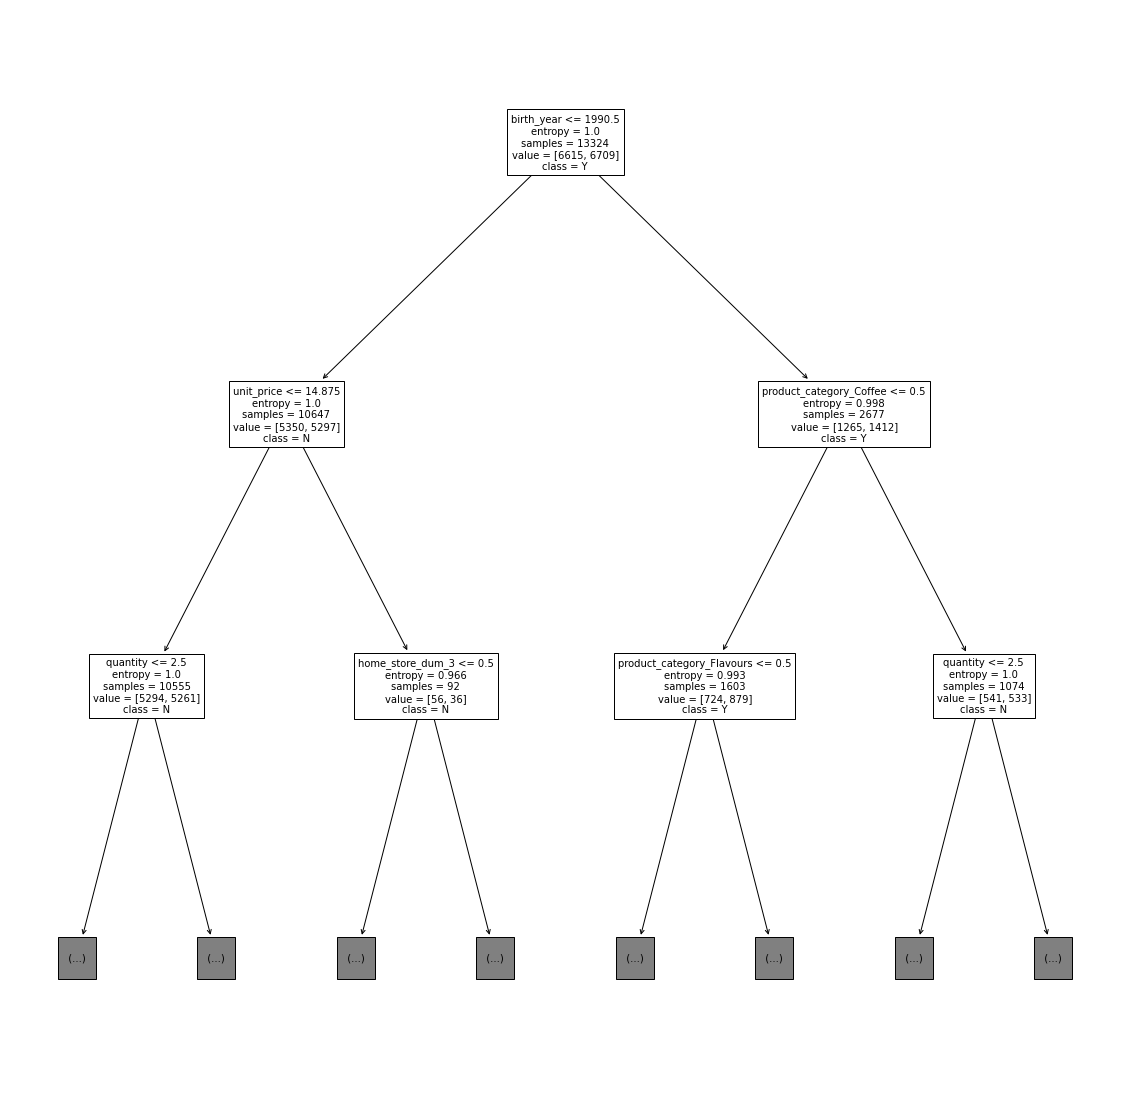

In [256]:
plt.figure(figsize=(20, 20))
tree.plot_tree(TreeClassifier, feature_names = featureNames, class_names = classNames, max_depth = 2, fontsize = 10)
#plt.show()

## b. Logistic Regression

In [242]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [243]:
logisticRegr = LogisticRegression(max_iter = 300)

In [244]:
logisticRegr.fit(training_X, training_Y)

LogisticRegression(max_iter=300)

In [245]:
Logit_pred_test = logisticRegr.predict(test_X)
Logit_pred_train = logisticRegr.predict(training_X)

In [246]:
Logit_pred_test

array([1, 1, 1, ..., 1, 1, 1])

In [247]:
score = logisticRegr.score(test_X, test_Y)
print(score)

0.5081421817545089


In [248]:
train_score = logisticRegr.score(training_X, training_Y)
print(train_score)

0.5135094566196338


In [249]:
x=Table_4[["quantity","unit_price","birth_year", "home_store_dum_5", "home_store_dum_8",
              "gender_M", "generation_Gen_X", "generation_Gen_Z", "generation_Older_Millennials", 
              "generation_Younger_Millennials", "product_category_Bakery", "product_category_Branded", 
               "product_category_Coffee_beans", "product_category_Drinking_Chocolate",
              "product_category_Flavours", "product_category_Loose_Tea", "product_category_Packaged_Chocolate", 
              "product_category_Tea", "tax_exempt_yn_Y"]]
y=Table_4['instore_yn']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10,train_size=0.7)

In [250]:
m = LogisticRegression(solver='lbfgs',max_iter=300).fit(xtrain,ytrain)
m.coef_

array([[-2.45868290e-04, -9.69766225e-03,  2.42159487e-05,
         7.43195439e-05,  2.41099668e-03, -1.76950789e-03,
        -8.87285663e-03,  5.97995679e-03, -1.25033170e-03,
         3.96818987e-03,  1.78512042e-03, -3.86152917e-04,
        -6.58616856e-05, -9.81349032e-04,  6.65348067e-04,
        -9.20266142e-04,  4.18859771e-04,  5.89539153e-03,
        -1.50857803e-03]])

In [251]:
ytrain = ytrain.str.replace('Y','1')
ytrain = ytrain.str.replace('N','0')
ytrain = ytrain.astype(int)

In [252]:
m2=sm.Logit(ytrain,xtrain.astype(float)).fit()
m2.summary()

Optimization terminated successfully.
         Current function value: 0.692436
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             instore_yn   No. Observations:                13324
Model:                          Logit   Df Residuals:                    13305
Method:                           MLE   Df Model:                           18
Date:                Sun, 31 Jul 2022   Pseudo R-squ.:               0.0009903
Time:                        20:03:44   Log-Likelihood:                -9226.0
converged:                       True   LL-Null:                       -9235.2
Covariance Type:            nonrobust   LLR p-value:                    0.4367
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
quantity                                0.0029      0.036      0.082      0.934      -0.067       0.073
unit_price                              0.0067      0.016      0.426      0.670      -0.024       0.038
birth_year                             -0.0004      0.005     -0.078      0.938      -0.010       0.009
home_store_dum_5                        0.0133      0.043      0.310      0.757      -0.071       0.098
home_store_dum_8                        0.0294      0.041      0.713      0.476      -0.051       0.110
gender_M                               -0.0126      0.035     -0.359      0.719      -0.082       0.056
generation_Gen_X                       -0.0606      0.085     -0.716      0.474      -0.227       0.105
generation_Gen_Z                        0.1125      0.205      0.549      0.583      -0.289       0.514
generation_Older_Millennials           -0.0032      0.142     -0.022      0.982      -0.281       0.274
generation_Younger_Millennials          0.0926      0.180      0.514      0.607      -0.260       0.445
product_category_Bakery                 0.7476      9.474      0.079      0.937     -17.821      19.316
product_category_Branded                0.3697      9.481      0.039      0.969     -18.213      18.953
product_category_Coffee_beans          -0.0998      0.333     -0.300      0.764      -0.752       0.553
product_category_Drinking_Chocolate     0.0037      0.070      0.053      0.958      -0.134       0.141
product_category_Flavours               0.0942      0.109      0.861      0.389      -0.120       0.309
product_category_Loose_Tea             -0.3090      0.241     -1.281      0.200      -0.782       0.164
product_category_Packaged_Chocolate     0.3228      0.353      0.914      0.361      -0.370       1.015
product_category_Tea                    0.0722      0.041      1.746      0.081      -0.009       0.153
tax_exempt_yn_Y                         0.6923      9.474      0.073      0.942     -17.877      19.261
=======================================================================================================
"""

## c. SVM

In [257]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [258]:
SVM_clf = svm.SVC()

In [259]:
SVM_clf.fit(training_X, training_Y)

SVC()

In [268]:
SVM_predict_train = SVM_clf.predict(training_X)
accuracy_score(SVM_predict_train, training_Y)

0.5035274692284599

In [269]:
SVM_predict_test = SVM_clf.predict(test_X)
accuracy_score(SVM_predict_test, test_Y)

0.5035895639992995

## Random Forest regression

In [262]:
from sklearn.ensemble import RandomForestClassifier

In [263]:
RF_Clf = RandomForestClassifier(n_estimators = 300, max_depth = 2 , bootstrap = True, 
                                max_features = "auto" , criterion = "entropy")


In [264]:
RF_Clf

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=300)

In [265]:
RF_Clf.fit(training_X, training_Y)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=300)

In [266]:
RF_predict_train = RF_Clf.predict(training_X)
accuracy_score(RF_predict_train, training_Y)

0.5220654458120685

In [267]:
RF_predict_test = RF_Clf.predict(test_X)
accuracy_score(RF_predict_test, test_Y)

0.5097180879005428

# Model Evaluation: SVM,DT, Logit & RF

In [127]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Confusion Matrix_ SVM

In [128]:
matrix = confusion_matrix(test_Y,  SVM_predict_test)
print(matrix)

[[   0 2835]
 [   0 2876]]


In [129]:
tn_SVM, fp_SVM, fn_SVM, tp_SVM = confusion_matrix(test_Y, SVM_predict_test).ravel()

In [130]:
report = classification_report(test_Y, SVM_predict_test)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2835
           1       0.50      1.00      0.67      2876

    accuracy                           0.50      5711
   macro avg       0.25      0.50      0.33      5711
weighted avg       0.25      0.50      0.34      5711



C:\Users\satar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\satar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\satar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# the first line with 0 is for negetive cases
# the second line with 1 is for positive cases
# Recall for 0 is same as specificity

In [ ]:
# the SVM is good at predicting the positive cases and can not precist at all the negetive cases

### Confusion Matrix_DT Model


In [131]:
matrix = confusion_matrix(test_Y, prediction_test) 
print(matrix)

[[1534 1301]
 [1535 1341]]


In [132]:
tn_DT, fp_DT, fn_DT, tp_DT = confusion_matrix(test_Y, prediction_test).ravel()

In [133]:
report = classification_report(test_Y, prediction_test)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.54      0.52      2835
           1       0.51      0.47      0.49      2876

    accuracy                           0.50      5711
   macro avg       0.50      0.50      0.50      5711
weighted avg       0.50      0.50      0.50      5711



In [ ]:
# the DT is better in predicting the positive cases more than the negetive cases

### Confusion Matrix_Logit Model

In [134]:
matrix = confusion_matrix(test_Y, Logit_pred_test) 
print(matrix)

[[1166 1669]
 [1140 1736]]


In [135]:
tn_Logit, fp_Logit, fn_Logit, tp_Logit = confusion_matrix(test_Y, Logit_pred_test).ravel()

In [136]:
from sklearn.metrics import classification_report

In [137]:
report = classification_report(test_Y, Logit_pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.41      0.45      2835
           1       0.51      0.60      0.55      2876

    accuracy                           0.51      5711
   macro avg       0.51      0.51      0.50      5711
weighted avg       0.51      0.51      0.50      5711



In [ ]:
# the Logit is equally good at predicting the positive cases and the negetive cases

### Confusion Matrix_RF Model

In [138]:
matrix = confusion_matrix(test_Y, Logit_pred_test) 
print(matrix)

[[1166 1669]
 [1140 1736]]


In [139]:
tn_RF, fp_RF, fn_RF, tp_RF = confusion_matrix(test_Y, RF_predict_test).ravel()

In [140]:
report = classification_report(test_Y, RF_predict_test)
print(report)

              precision    recall  f1-score   support

           0       0.52      0.30      0.38      2835
           1       0.51      0.72      0.60      2876

    accuracy                           0.51      5711
   macro avg       0.51      0.51      0.49      5711
weighted avg       0.51      0.51      0.49      5711



In [ ]:
# the RF is better in predicting the negetive cases more than the positive cases

### Scores_SVM

In [270]:
## Precision
precision_SVM = tp_SVM / (tp_SVM + fp_SVM)
precision_SVM

0.5035895639992995

In [271]:
## Recall 
recall_SVM = tp_SVM / (tp_SVM + fn_SVM)
recall_SVM

1.0

In [272]:
## Specificity
specificity_SVM = tn_SVM / (tn_SVM + fp_SVM)
specificity_SVM

0.0

### Scores_DT

In [273]:
## Precision
precision_DT = tp_DT / (tp_DT + fp_DT)
precision_DT

0.5075700227100681

In [274]:
## Recall 
recall_DT = tp_DT / (tp_DT + fn_DT)
recall_DT

0.46627260083449235

In [275]:
## Specificity
specificity_DT = tn_DT / (tn_DT + fp_DT)
specificity_DT

0.5410934744268078

### Scores_Logit


In [276]:
## Precision
precision_Logit = tp_Logit / (tp_Logit + fp_Logit)
precision_Logit

0.5098384728340676

In [277]:
## Recall 
recall_Logit = tp_Logit/ (tp_Logit + fn_Logit)
recall_Logit

0.6036161335187761

In [282]:
## Specificity
specificity_Logit = tn_Logit / (tn_Logit + fn_Logit)
specificity_Logit

0.5056374674761491

### Scores_RF

In [279]:
## Precision
precision_RF = tp_RF / (tp_RF + fp_RF)
precision_RF

0.5113636363636364

In [280]:
## Recall 
recall_RF = tp_RF/ (tp_RF + fn_RF)
recall_Logit

0.6036161335187761

In [281]:
## Specificity
specificity_RF = tn_RF / (tn_RF + fp_RF)
specificity_RF

0.30229276895943563

# F. Clustering Analysis

In [113]:
df_gen = pd.read_csv('generation.csv')

df_gen.head()

,birth_year,generation
0,1946,Baby_Boomers
1,1947,Baby_Boomers
2,1948,Baby_Boomers
3,1949,Baby_Boomers
4,1950,Baby_Boomers


In [114]:
OLSInt.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983
1,1539,2019-04-01,16:49:47,3,12,558,N,1,1,29,1,2.50,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983
2,2188,2019-04-01,15:01:02,3,17,558,Y,1,1,48,2,5.00,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983
3,78,2019-04-02,15:24:16,3,17,558,N,1,1,60,1,3.75,3.75,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983
4,14,2019-04-03,19:45:56,3,12,558,N,1,1,32,1,3.00,3.00,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983


In [115]:
kcust_merge = pd.merge( left = OLSInt,  right = df_gen, how="inner", on="birth_year")
kcust_merge


,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials
1,1539,2019-04-01,16:49:47,3,12,558,N,1,1,29,1,2.50,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials
2,2188,2019-04-01,15:01:02,3,17,558,Y,1,1,48,2,5.00,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials
3,78,2019-04-02,15:24:16,3,17,558,N,1,1,60,1,3.75,3.75,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials
4,14,2019-04-03,19:45:56,3,12,558,N,1,1,32,1,3.00,3.00,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19068,427,2019-04-08,16:01:25,5,30,5859,N,1,2,65,2,1.60,0.80,N,5,Chantale,Erich@litora.us,2017-11-01,949-598-3906,1968-12-12,F,1968,Gen_X
19069,1885,2019-04-18,15:41:47,5,29,5859,Y,1,1,45,1,3.00,3.00,N,5,Chantale,Erich@litora.us,2017-11-01,949-598-3906,1968-12-12,F,1968,Gen_X
19070,20,2019-04-07,14:08:19,3,20,445,N,1,1,47,1,3.00,3.00,N,3,Maya Moreno,Owen@rutrum.org,2017-10-28,064-641-8434,1968-09-26,F,1968,Gen_X
19071,1457,2019-04-22,10:29:54,3,16,445,Y,1,1,59,2,9.00,4.50,N,3,Maya Moreno,Owen@rutrum.org,2017-10-28,064-641-8434,1968-09-26,F,1968,Gen_X


In [116]:
kcust_merge = pd.merge( left = OLSInt,  right = df_gen, how="inner", on="birth_year")
kcust_merge

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials
1,1539,2019-04-01,16:49:47,3,12,558,N,1,1,29,1,2.50,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials
2,2188,2019-04-01,15:01:02,3,17,558,Y,1,1,48,2,5.00,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials
3,78,2019-04-02,15:24:16,3,17,558,N,1,1,60,1,3.75,3.75,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials
4,14,2019-04-03,19:45:56,3,12,558,N,1,1,32,1,3.00,3.00,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19068,427,2019-04-08,16:01:25,5,30,5859,N,1,2,65,2,1.60,0.80,N,5,Chantale,Erich@litora.us,2017-11-01,949-598-3906,1968-12-12,F,1968,Gen_X
19069,1885,2019-04-18,15:41:47,5,29,5859,Y,1,1,45,1,3.00,3.00,N,5,Chantale,Erich@litora.us,2017-11-01,949-598-3906,1968-12-12,F,1968,Gen_X
19070,20,2019-04-07,14:08:19,3,20,445,N,1,1,47,1,3.00,3.00,N,3,Maya Moreno,Owen@rutrum.org,2017-10-28,064-641-8434,1968-09-26,F,1968,Gen_X
19071,1457,2019-04-22,10:29:54,3,16,445,Y,1,1,59,2,9.00,4.50,N,3,Maya Moreno,Owen@rutrum.org,2017-10-28,064-641-8434,1968-09-26,F,1968,Gen_X


In [117]:
gen_dumm = pd.get_dummies(kcust_merge['generation'], prefix="generation")
generation_dum = pd.concat([kcust_merge, gen_dumm], axis = 1)
gent_dum= generation_dum.dropna()
gent_dum

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation,generation_Baby_Boomers,generation_Gen_X,generation_Gen_Z,generation_Older_Millennials,generation_Younger_Millennials
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials,0,0,0,1,0
1,1539,2019-04-01,16:49:47,3,12,558,N,1,1,29,1,2.50,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials,0,0,0,1,0
2,2188,2019-04-01,15:01:02,3,17,558,Y,1,1,48,2,5.00,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials,0,0,0,1,0
3,78,2019-04-02,15:24:16,3,17,558,N,1,1,60,1,3.75,3.75,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials,0,0,0,1,0
4,14,2019-04-03,19:45:56,3,12,558,N,1,1,32,1,3.00,3.00,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19068,427,2019-04-08,16:01:25,5,30,5859,N,1,2,65,2,1.60,0.80,N,5,Chantale,Erich@litora.us,2017-11-01,949-598-3906,1968-12-12,F,1968,Gen_X,0,1,0,0,0
19069,1885,2019-04-18,15:41:47,5,29,5859,Y,1,1,45,1,3.00,3.00,N,5,Chantale,Erich@litora.us,2017-11-01,949-598-3906,1968-12-12,F,1968,Gen_X,0,1,0,0,0
19070,20,2019-04-07,14:08:19,3,20,445,N,1,1,47,1,3.00,3.00,N,3,Maya Moreno,Owen@rutrum.org,2017-10-28,064-641-8434,1968-09-26,F,1968,Gen_X,0,1,0,0,0
19071,1457,2019-04-22,10:29:54,3,16,445,Y,1,1,59,2,9.00,4.50,N,3,Maya Moreno,Owen@rutrum.org,2017-10-28,064-641-8434,1968-09-26,F,1968,Gen_X,0,1,0,0,0


In [118]:
st_dumm = pd.get_dummies(gent_dum['instore_yn'], prefix="instore_yn")
store_dummies = pd.concat([gent_dum, st_dumm], axis = 1)
store_dum= store_dummies.dropna()

store_dum


,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation,generation_Baby_Boomers,generation_Gen_X,generation_Gen_Z,generation_Older_Millennials,generation_Younger_Millennials,instore_yn_,instore_yn_N,instore_yn_Y
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials,0,0,0,1,0,0,1,0
1,1539,2019-04-01,16:49:47,3,12,558,N,1,1,29,1,2.50,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials,0,0,0,1,0,0,1,0
2,2188,2019-04-01,15:01:02,3,17,558,Y,1,1,48,2,5.00,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials,0,0,0,1,0,0,0,1
3,78,2019-04-02,15:24:16,3,17,558,N,1,1,60,1,3.75,3.75,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials,0,0,0,1,0,0,1,0
4,14,2019-04-03,19:45:56,3,12,558,N,1,1,32,1,3.00,3.00,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19068,427,2019-04-08,16:01:25,5,30,5859,N,1,2,65,2,1.60,0.80,N,5,Chantale,Erich@litora.us,2017-11-01,949-598-3906,1968-12-12,F,1968,Gen_X,0,1,0,0,0,0,1,0
19069,1885,2019-04-18,15:41:47,5,29,5859,Y,1,1,45,1,3.00,3.00,N,5,Chantale,Erich@litora.us,2017-11-01,949-598-3906,1968-12-12,F,1968,Gen_X,0,1,0,0,0,0,0,1
19070,20,2019-04-07,14:08:19,3,20,445,N,1,1,47,1,3.00,3.00,N,3,Maya Moreno,Owen@rutrum.org,2017-10-28,064-641-8434,1968-09-26,F,1968,Gen_X,0,1,0,0,0,0,1,0
19071,1457,2019-04-22,10:29:54,3,16,445,Y,1,1,59,2,9.00,4.50,N,3,Maya Moreno,Owen@rutrum.org,2017-10-28,064-641-8434,1968-09-26,F,1968,Gen_X,0,1,0,0,0,0,0,1


In [119]:
store_dum['z_birth_year']=preprocessing.scale(store_dum.birth_year)
store_dum['z_unit_price']=preprocessing.scale(store_dum.order)
store_dum['z_product_id']=preprocessing.scale(store_dum.product_id)
store_dum['z_Baby_Boomers']=preprocessing.scale(store_dum.generation_Baby_Boomers)
store_dum['z_Gen_X']=preprocessing.scale(store_dum.generation_Gen_X)
store_dum['z_Gen_Z']=preprocessing.scale(store_dum.generation_Gen_Z)
store_dum['z_instore_yn_Y']=preprocessing.scale(store_dum.instore_yn_Y)
store_dum.describe()

,transaction_id,sales_outlet_id,staff_id,customer_id,order,line_item_id,product_id,quantity,line_item_amount,unit_price,home_store,birth_year,generation_Baby_Boomers,generation_Gen_X,generation_Gen_Z,generation_Older_Millennials,generation_Younger_Millennials,instore_yn_,instore_yn_N,instore_yn_Y,z_birth_year,z_unit_price,z_product_id,z_Baby_Boomers,z_Gen_X,z_Gen_Z,z_instore_yn_Y
count,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,1.907300e+04,1.907300e+04,1.907300e+04,1.907300e+04,1.907300e+04,1.907300e+04,1.907300e+04
mean,902.129922,5.185812,24.457820,4355.806847,1.126776,1.612856,47.464269,1.431081,4.606608,3.327129,5.185812,1975.097992,0.299009,0.281707,0.123997,0.197190,0.098097,0.001992,0.495465,0.502543,7.623052e-15,-1.908713e-15,-5.328465e-17,-6.009745e-15,-1.119606e-14,3.374867e-15,-8.798312e-16
std,855.630925,2.113514,12.414832,3414.766909,0.869212,1.412086,17.462054,0.522042,3.789490,2.351249,2.113514,14.847657,0.457836,0.449843,0.329587,0.397887,0.297453,0.044592,0.499993,0.500007,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,1.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.800000,3.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.690412e+00,-1.458556e-01,-2.660940e+00,-6.531095e-01,-6.262506e-01,-3.762299e-01,-1.005099e+00
25%,226.000000,3.000000,14.000000,444.000000,1.000000,1.000000,33.000000,1.000000,3.000000,2.500000,3.000000,1962.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.821820e-01,-1.458556e-01,-8.283474e-01,-6.531095e-01,-6.262506e-01,-3.762299e-01,-1.005099e+00
50%,519.000000,5.000000,20.000000,5361.000000,1.000000,1.000000,46.000000,1.000000,3.750000,3.000000,5.000000,1975.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-6.599997e-03,-1.458556e-01,-8.385653e-02,-6.531095e-01,-6.262506e-01,-3.762299e-01,9.949271e-01
75%,1503.000000,8.000000,30.000000,8119.000000,1.000000,1.000000,59.000000,2.000000,6.000000,3.750000,8.000000,1988.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.689820e-01,-1.458556e-01,6.606344e-01,1.531137e+00,1.596805e+00,-3.762299e-01,9.949271e-01
max,4184.000000,8.000000,45.000000,8501.000000,9.000000,10.000000,87.000000,8.000000,360.000000,45.000000,8.000000,2001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.744564e+00,9.058125e+00,2.264153e+00,1.531137e+00,1.596805e+00,2.657949e+00,9.949271e-01


Text(0, 0.5, 'Sum of Squared Errors')

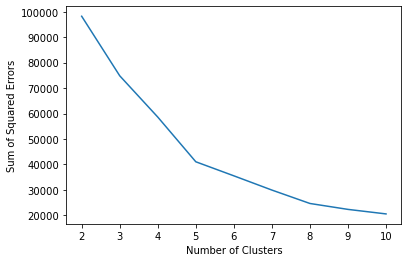

In [122]:
from sklearn import cluster

ss=[]
krange = range(2,11)  # 2~10
x=store_dum[['z_birth_year', 'z_unit_price','z_product_id','z_Baby_Boomers','z_Gen_X','z_Gen_Z','z_instore_yn_Y']]
for i in krange:
    m = cluster.KMeans(n_clusters=i).fit(x)
    error = m.inertia_
    ss.append(error)
 # inertia_: Sum of squared distances of samples to their closest cluster center
   
plt.plot(krange, ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')  

In [123]:
m = cluster.KMeans(n_clusters=5, random_state=10).fit(x)
store_dum['cluster'] = m.labels_  # cluster labels
store_dum.describe()

,transaction_id,sales_outlet_id,staff_id,customer_id,order,line_item_id,product_id,quantity,line_item_amount,unit_price,home_store,birth_year,generation_Baby_Boomers,generation_Gen_X,generation_Gen_Z,generation_Older_Millennials,generation_Younger_Millennials,instore_yn_,instore_yn_N,instore_yn_Y,z_birth_year,z_unit_price,z_product_id,z_Baby_Boomers,z_Gen_X,z_Gen_Z,z_instore_yn_Y,cluster
count,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,19073.000000,1.907300e+04,1.907300e+04,1.907300e+04,1.907300e+04,1.907300e+04,1.907300e+04,1.907300e+04,19073.000000
mean,902.129922,5.185812,24.457820,4355.806847,1.126776,1.612856,47.464269,1.431081,4.606608,3.327129,5.185812,1975.097992,0.299009,0.281707,0.123997,0.197190,0.098097,0.001992,0.495465,0.502543,7.623052e-15,-1.908713e-15,-5.328465e-17,-6.009745e-15,-1.119606e-14,3.374867e-15,-8.798312e-16,1.420962
std,855.630925,2.113514,12.414832,3414.766909,0.869212,1.412086,17.462054,0.522042,3.789490,2.351249,2.113514,14.847657,0.457836,0.449843,0.329587,0.397887,0.297453,0.044592,0.499993,0.500007,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.250946
min,1.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.800000,3.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.690412e+00,-1.458556e-01,-2.660940e+00,-6.531095e-01,-6.262506e-01,-3.762299e-01,-1.005099e+00,0.000000
25%,226.000000,3.000000,14.000000,444.000000,1.000000,1.000000,33.000000,1.000000,3.000000,2.500000,3.000000,1962.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.821820e-01,-1.458556e-01,-8.283474e-01,-6.531095e-01,-6.262506e-01,-3.762299e-01,-1.005099e+00,0.000000
50%,519.000000,5.000000,20.000000,5361.000000,1.000000,1.000000,46.000000,1.000000,3.750000,3.000000,5.000000,1975.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-6.599997e-03,-1.458556e-01,-8.385653e-02,-6.531095e-01,-6.262506e-01,-3.762299e-01,9.949271e-01,1.000000
75%,1503.000000,8.000000,30.000000,8119.000000,1.000000,1.000000,59.000000,2.000000,6.000000,3.750000,8.000000,1988.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.689820e-01,-1.458556e-01,6.606344e-01,1.531137e+00,1.596805e+00,-3.762299e-01,9.949271e-01,2.000000
max,4184.000000,8.000000,45.000000,8501.000000,9.000000,10.000000,87.000000,8.000000,360.000000,45.000000,8.000000,2001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.744564e+00,9.058125e+00,2.264153e+00,1.531137e+00,1.596805e+00,2.657949e+00,9.949271e-01,4.000000


In [124]:
store_dum.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation,generation_Baby_Boomers,generation_Gen_X,generation_Gen_Z,generation_Older_Millennials,generation_Younger_Millennials,instore_yn_,instore_yn_N,instore_yn_Y,z_birth_year,z_unit_price,z_product_id,z_Baby_Boomers,z_Gen_X,z_Gen_Z,z_instore_yn_Y,cluster
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials,0,0,0,1,0,0,1,0,0.53222,-0.145856,0.259755,-0.653109,-0.626251,-0.37623,-1.005099,1
1,1539,2019-04-01,16:49:47,3,12,558,N,1,1,29,1,2.50,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials,0,0,0,1,0,0,1,0,0.53222,-0.145856,-1.057422,-0.653109,-0.626251,-0.37623,-1.005099,1
2,2188,2019-04-01,15:01:02,3,17,558,Y,1,1,48,2,5.00,2.50,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials,0,0,0,1,0,0,0,1,0.53222,-0.145856,0.030681,-0.653109,-0.626251,-0.37623,0.994927,1
3,78,2019-04-02,15:24:16,3,17,558,N,1,1,60,1,3.75,3.75,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials,0,0,0,1,0,0,1,0,0.53222,-0.145856,0.717903,-0.653109,-0.626251,-0.37623,-1.005099,1
4,14,2019-04-03,19:45:56,3,12,558,N,1,1,32,1,3.00,3.00,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Older_Millennials,0,0,0,1,0,0,1,0,0.53222,-0.145856,-0.885616,-0.653109,-0.626251,-0.37623,-1.005099,1


In [125]:
m.cluster_centers_

array([[-2.22503758e-01, -1.38430183e-01,  3.02348242e-02,
        -6.53109472e-01,  1.59680492e+00, -3.76229928e-01,
        -3.35599614e-02],
       [ 7.96749807e-01, -1.40020766e-01,  2.21851678e-02,
        -6.53109472e-01, -6.26250574e-01, -3.76229928e-01,
         2.51627456e-02],
       [-1.20856662e+00, -1.39678951e-01,  1.98068938e-02,
         1.53113688e+00, -6.26250574e-01, -3.76229928e-01,
        -1.00965911e-02],
       [ 2.99639551e-03,  6.89980393e+00, -1.29586417e+00,
         9.65657222e-03, -1.03644858e-02,  8.04604471e-03,
        -3.41099111e-02],
       [ 1.52163519e+00, -1.43372835e-01,  4.25939726e-02,
        -6.53109472e-01, -6.26250574e-01,  2.65794911e+00,
         4.62743918e-02]])

In [126]:
# 3 columns with 3 clusters ^ 

In [127]:
store_dum.groupby('cluster').mean()
#pd.set_option('display.max_columns', None)
#store_dum

,transaction_id,sales_outlet_id,staff_id,customer_id,order,line_item_id,product_id,quantity,line_item_amount,unit_price,home_store,birth_year,generation_Baby_Boomers,generation_Gen_X,generation_Gen_Z,generation_Older_Millennials,generation_Younger_Millennials,instore_yn_,instore_yn_N,instore_yn_Y,z_birth_year,z_unit_price,z_product_id,z_Baby_Boomers,z_Gen_X,z_Gen_Z,z_instore_yn_Y
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,892.466021,5.148254,24.029423,4293.582384,1.006454,1.596621,47.992217,1.457669,4.430632,3.085852,5.148254,1971.794419,0.00000,1.000000,0.000000,0.000000,0.000000,0.002278,0.511959,0.485763,-0.222504,-0.138430,0.030235,-0.653109,1.596805,-0.376230,-0.033560
1,915.320956,5.161203,24.389784,4343.060859,1.005072,1.612027,47.851657,1.428002,4.351681,3.093177,5.161203,1986.927549,0.00000,0.000000,0.000000,0.667995,0.332005,0.001087,0.483789,0.515124,0.796750,-0.140021,0.022185,-0.653109,-0.626251,-0.376230,0.025163
2,913.856657,5.241768,24.938797,4375.476020,1.005369,1.634395,47.810129,1.429671,4.329945,3.077627,5.241768,1957.154080,1.00000,0.000000,0.000000,0.000000,0.000000,0.002684,0.499821,0.497495,-1.208567,-0.139679,0.019807,1.531137,-0.626251,-0.376230,-0.010097
3,529.738786,5.662269,27.081794,5210.316623,7.124011,1.556728,24.836412,1.018470,16.058338,15.248971,5.662269,1975.142480,0.30343,0.277045,0.126649,0.192612,0.100264,0.002639,0.511873,0.485488,0.002996,6.899804,-1.295864,0.009657,-0.010364,0.008046,-0.034110
4,925.301683,5.116962,24.004748,4340.441519,1.002158,1.608977,48.208028,1.448856,4.408200,3.084808,5.116962,1997.690117,0.00000,0.000000,1.000000,0.000000,0.000000,0.001726,0.472594,0.525680,1.521635,-0.143373,0.042594,-0.653109,-0.626251,2.657949,0.046274


In [128]:
# We find: 
# Cluster 0 has highest amount of customers from Gen Z at 2.18
# Clusters 0 has the highest instore purchases by Gen Z at 0.037
#Cluster 0 has the higest birth year 1.28
#Cluster 0 has the highest product_id sold at 0.05 
#Cluster 4 has the unit price sold at 6.79 ($14) 

In [129]:
store_dum.groupby('cluster').count()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation,generation_Baby_Boomers,generation_Gen_X,generation_Gen_Z,generation_Older_Millennials,generation_Younger_Millennials,instore_yn_,instore_yn_N,instore_yn_Y,z_birth_year,z_unit_price,z_product_id,z_Baby_Boomers,z_Gen_X,z_Gen_Z,z_instore_yn_Y
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268
1,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521
2,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588
3,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379
4,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317


In [130]:
## Reporting top 3 (birth year) of customers that purchase the most in store 
## Highest amount of purchases in store happen by birth year from customers are in clusters 1 and 2, we want to find the top 3 years those customers were born in. 

In [131]:
store_dum.loc[store_dum.cluster==0]

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation,generation_Baby_Boomers,generation_Gen_X,generation_Gen_Z,generation_Older_Millennials,generation_Younger_Millennials,instore_yn_,instore_yn_N,instore_yn_Y,z_birth_year,z_unit_price,z_product_id,z_Baby_Boomers,z_Gen_X,z_Gen_Z,z_instore_yn_Y,cluster
662,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N,3,Orlando Shields,Ivory@scelerisque.us,2017-10-01,747-164-4596,1967-01-29,M,1967,Gen_X,0,1,0,0,0,0,0,1,-0.545420,-0.145856,-0.771079,-0.653109,1.596805,-0.37623,0.994927,0
663,801,2019-04-02,17:33:04,3,12,99,N,1,1,40,2,7.50,3.75,N,3,Orlando Shields,Ivory@scelerisque.us,2017-10-01,747-164-4596,1967-01-29,M,1967,Gen_X,0,1,0,0,0,0,1,0,-0.545420,-0.145856,-0.427468,-0.653109,1.596805,-0.37623,-1.005099,0
664,1157,2019-04-02,17:34:58,3,17,99,N,1,1,42,2,5.00,2.50,N,3,Orlando Shields,Ivory@scelerisque.us,2017-10-01,747-164-4596,1967-01-29,M,1967,Gen_X,0,1,0,0,0,0,1,0,-0.545420,-0.145856,-0.312931,-0.653109,1.596805,-0.37623,-1.005099,0
665,355,2019-04-03,15:24:46,3,17,99,N,1,1,28,2,4.00,2.00,N,3,Orlando Shields,Ivory@scelerisque.us,2017-10-01,747-164-4596,1967-01-29,M,1967,Gen_X,0,1,0,0,0,0,1,0,-0.545420,-0.145856,-1.114690,-0.653109,1.596805,-0.37623,-1.005099,0
666,1099,2019-04-03,11:47:13,3,12,99,N,1,1,41,2,8.50,4.25,N,3,Orlando Shields,Ivory@scelerisque.us,2017-10-01,747-164-4596,1967-01-29,M,1967,Gen_X,0,1,0,0,0,0,1,0,-0.545420,-0.145856,-0.370199,-0.653109,1.596805,-0.37623,-1.005099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19068,427,2019-04-08,16:01:25,5,30,5859,N,1,2,65,2,1.60,0.80,N,5,Chantale,Erich@litora.us,2017-11-01,949-598-3906,1968-12-12,F,1968,Gen_X,0,1,0,0,0,0,1,0,-0.478067,-0.145856,1.004246,-0.653109,1.596805,-0.37623,-1.005099,0
19069,1885,2019-04-18,15:41:47,5,29,5859,Y,1,1,45,1,3.00,3.00,N,5,Chantale,Erich@litora.us,2017-11-01,949-598-3906,1968-12-12,F,1968,Gen_X,0,1,0,0,0,0,0,1,-0.478067,-0.145856,-0.141125,-0.653109,1.596805,-0.37623,0.994927,0
19070,20,2019-04-07,14:08:19,3,20,445,N,1,1,47,1,3.00,3.00,N,3,Maya Moreno,Owen@rutrum.org,2017-10-28,064-641-8434,1968-09-26,F,1968,Gen_X,0,1,0,0,0,0,1,0,-0.478067,-0.145856,-0.026588,-0.653109,1.596805,-0.37623,-1.005099,0
19071,1457,2019-04-22,10:29:54,3,16,445,Y,1,1,59,2,9.00,4.50,N,3,Maya Moreno,Owen@rutrum.org,2017-10-28,064-641-8434,1968-09-26,F,1968,Gen_X,0,1,0,0,0,0,0,1,-0.478067,-0.145856,0.660634,-0.653109,1.596805,-0.37623,0.994927,0


In [132]:
store_dum.loc[store_dum.cluster==0].sort_values(['birth_year'], ascending = False)
#pd.set_option('display.max_columns', None)
#store_dum

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation,generation_Baby_Boomers,generation_Gen_X,generation_Gen_Z,generation_Older_Millennials,generation_Younger_Millennials,instore_yn_,instore_yn_N,instore_yn_Y,z_birth_year,z_unit_price,z_product_id,z_Baby_Boomers,z_Gen_X,z_Gen_Z,z_instore_yn_Y,cluster
6262,394,2019-04-09,12:38:33,8,43,8070,Y,1,1,36,1,3.75,3.75,N,8,Rahim,Mufutau@enim.net,2017-03-04,529-580-6357,1979-08-13,M,1979,Gen_X,0,1,0,0,0,0,0,1,0.262810,-0.145856,-0.656542,-0.653109,1.596805,-0.37623,0.994927,0
6196,1607,2019-04-05,13:51:56,3,17,171,Y,1,1,28,2,4.00,2.00,N,3,Warren Church,Warren@Curabitur.edu,2018-04-18,440-377-0128,1979-04-29,M,1979,Gen_X,0,1,0,0,0,0,0,1,0.262810,-0.145856,-1.114690,-0.653109,1.596805,-0.37623,0.994927,0
6182,1652,2019-04-04,14:36:20,8,45,8359,Y,1,1,36,2,7.50,3.75,N,8,Emi,Drake@pede.org,2017-08-19,885-078-9019,1979-07-03,F,1979,Gen_X,0,1,0,0,0,0,0,1,0.262810,-0.145856,-0.656542,-0.653109,1.596805,-0.37623,0.994927,0
6183,1229,2019-04-05,12:22:37,8,15,8359,N,1,1,44,2,5.00,2.50,N,8,Emi,Drake@pede.org,2017-08-19,885-078-9019,1979-07-03,F,1979,Gen_X,0,1,0,0,0,0,1,0,0.262810,-0.145856,-0.198394,-0.653109,1.596805,-0.37623,-1.005099,0
6184,2839,2019-04-06,17:01:53,8,15,8359,N,1,1,38,2,7.50,3.75,N,8,Emi,Drake@pede.org,2017-08-19,885-078-9019,1979-07-03,F,1979,Gen_X,0,1,0,0,0,0,1,0,0.262810,-0.145856,-0.542005,-0.653109,1.596805,-0.37623,-1.005099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5363,810,2019-04-21,20:44:43,8,43,8364,N,1,5,75,1,3.50,3.50,N,8,Duncan,Jolie@dolor.gov,2017-10-21,645-021-7419,1965-02-16,M,1965,Gen_X,0,1,0,0,0,0,1,0,-0.680125,-0.145856,1.576931,-0.653109,1.596805,-0.37623,-1.005099,0
5362,810,2019-04-21,20:44:43,8,43,8364,N,1,1,22,2,4.00,2.00,N,8,Duncan,Jolie@dolor.gov,2017-10-21,645-021-7419,1965-02-16,M,1965,Gen_X,0,1,0,0,0,0,1,0,-0.680125,-0.145856,-1.458301,-0.653109,1.596805,-0.37623,-1.005099,0
5361,719,2019-04-15,07:13:25,8,44,8364,N,1,1,27,1,3.50,3.50,N,8,Duncan,Jolie@dolor.gov,2017-10-21,645-021-7419,1965-02-16,M,1965,Gen_X,0,1,0,0,0,0,1,0,-0.680125,-0.145856,-1.171959,-0.653109,1.596805,-0.37623,-1.005099,0
5360,124,2019-04-13,10:41:37,8,42,8364,N,1,1,51,2,6.00,3.00,N,8,Duncan,Jolie@dolor.gov,2017-10-21,645-021-7419,1965-02-16,M,1965,Gen_X,0,1,0,0,0,0,1,0,-0.680125,-0.145856,0.202486,-0.653109,1.596805,-0.37623,-1.005099,0


In [133]:
store_dum.loc[store_dum.cluster==2]

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation,generation_Baby_Boomers,generation_Gen_X,generation_Gen_Z,generation_Older_Millennials,generation_Younger_Millennials,instore_yn_,instore_yn_N,instore_yn_Y,z_birth_year,z_unit_price,z_product_id,z_Baby_Boomers,z_Gen_X,z_Gen_Z,z_instore_yn_Y,cluster
1538,50,2019-04-01,13:03:49,3,12,316,N,1,1,49,2,6.00,3.00,N,3,Camille Glass,Hedley@adipiscing.gov,2017-02-04,448-528-3198,1952-04-11,F,1952,Baby_Boomers,1,0,0,0,0,0,1,0,-1.555707,-0.145856,0.087949,1.531137,-0.626251,-0.37623,-1.005099,2
1539,1042,2019-04-01,19:45:16,3,12,316,N,1,1,41,1,4.25,4.25,N,3,Camille Glass,Hedley@adipiscing.gov,2017-02-04,448-528-3198,1952-04-11,F,1952,Baby_Boomers,1,0,0,0,0,0,1,0,-1.555707,-0.145856,-0.370199,1.531137,-0.626251,-0.37623,-1.005099,2
1540,543,2019-04-02,14:34:43,3,12,316,Y,1,1,55,1,4.00,4.00,N,3,Camille Glass,Hedley@adipiscing.gov,2017-02-04,448-528-3198,1952-04-11,F,1952,Baby_Boomers,1,0,0,0,0,0,0,1,-1.555707,-0.145856,0.431560,1.531137,-0.626251,-0.37623,0.994927,2
1541,985,2019-04-02,17:20:14,3,12,316,Y,1,1,57,1,3.10,3.10,N,3,Camille Glass,Hedley@adipiscing.gov,2017-02-04,448-528-3198,1952-04-11,F,1952,Baby_Boomers,1,0,0,0,0,0,0,1,-1.555707,-0.145856,0.546097,1.531137,-0.626251,-0.37623,0.994927,2
1542,1092,2019-04-04,12:55:04,3,17,316,Y,1,1,53,1,3.00,3.00,N,3,Camille Glass,Hedley@adipiscing.gov,2017-02-04,448-528-3198,1952-04-11,F,1952,Baby_Boomers,1,0,0,0,0,0,0,1,-1.555707,-0.145856,0.317023,1.531137,-0.626251,-0.37623,0.994927,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18229,890,2019-04-16,08:43:17,5,28,5498,Y,1,1,48,1,2.50,2.50,N,5,Julie,Patrick@netus.us,2017-01-18,150-700-9475,1951-03-25,F,1951,Baby_Boomers,1,0,0,0,0,0,0,1,-1.623059,-0.145856,0.030681,1.531137,-0.626251,-0.37623,0.994927,2
18230,339,2019-04-20,07:02:00,5,26,5498,N,1,1,22,3,6.00,2.00,N,5,Julie,Patrick@netus.us,2017-01-18,150-700-9475,1951-03-25,F,1951,Baby_Boomers,1,0,0,0,0,0,1,0,-1.623059,-0.145856,-1.458301,1.531137,-0.626251,-0.37623,-1.005099,2
18231,339,2019-04-20,07:02:00,5,26,5498,N,1,5,71,1,3.75,3.75,N,5,Julie,Patrick@netus.us,2017-01-18,150-700-9475,1951-03-25,F,1951,Baby_Boomers,1,0,0,0,0,0,1,0,-1.623059,-0.145856,1.347857,1.531137,-0.626251,-0.37623,-1.005099,2
18232,244,2019-04-27,09:04:04,5,30,5498,Y,1,1,41,2,8.50,4.25,N,5,Julie,Patrick@netus.us,2017-01-18,150-700-9475,1951-03-25,F,1951,Baby_Boomers,1,0,0,0,0,0,0,1,-1.623059,-0.145856,-0.370199,1.531137,-0.626251,-0.37623,0.994927,2


In [134]:
store_dum.loc[store_dum.cluster==2].sort_values(['birth_year'], ascending = False)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation,generation_Baby_Boomers,generation_Gen_X,generation_Gen_Z,generation_Older_Millennials,generation_Younger_Millennials,instore_yn_,instore_yn_N,instore_yn_Y,z_birth_year,z_unit_price,z_product_id,z_Baby_Boomers,z_Gen_X,z_Gen_Z,z_instore_yn_Y,cluster
5853,666,2019-04-05,18:27:38,3,12,84,N,1,1,41,1,4.25,4.25,N,3,Kareem Sanchez,Kuame@erat.org,2017-08-21,828-727-5876,1964-07-11,M,1964,Baby_Boomers,1,0,0,0,0,0,1,0,-0.747477,-0.145856,-0.370199,1.531137,-0.626251,-0.37623,-1.005099,2
5861,339,2019-04-19,10:43:35,3,16,84,N,1,1,47,2,6.00,3.00,N,3,Kareem Sanchez,Kuame@erat.org,2017-08-21,828-727-5876,1964-07-11,M,1964,Baby_Boomers,1,0,0,0,0,0,1,0,-0.747477,-0.145856,-0.026588,1.531137,-0.626251,-0.37623,-1.005099,2
5870,7,2019-04-08,09:32:15,3,7,410,Y,2,1,44,1,2.50,2.50,N,3,Vielka Hull,Ray@Donec.edu,2017-08-17,602-997-0035,1964-04-09,F,1964,Baby_Boomers,1,0,0,0,0,0,0,1,-0.747477,1.004642,-0.198394,1.531137,-0.626251,-0.37623,0.994927,2
5869,7,2019-04-08,09:32:15,3,7,410,Y,1,1,44,1,2.50,2.50,N,3,Vielka Hull,Ray@Donec.edu,2017-08-17,602-997-0035,1964-04-09,F,1964,Baby_Boomers,1,0,0,0,0,0,0,1,-0.747477,-0.145856,-0.198394,1.531137,-0.626251,-0.37623,0.994927,2
5868,96,2019-04-06,15:32:52,3,12,410,N,1,5,79,1,3.75,3.75,N,3,Vielka Hull,Ray@Donec.edu,2017-08-17,602-997-0035,1964-04-09,F,1964,Baby_Boomers,1,0,0,0,0,0,1,0,-0.747477,-0.145856,1.806005,1.531137,-0.626251,-0.37623,-1.005099,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461,2132,2019-04-19,13:21:25,8,45,8088,Y,1,5,73,1,3.75,3.75,N,8,Kareem,Brynn@tortor.org,2018-11-02,769-936-3409,1950-09-04,M,1950,Baby_Boomers,1,0,0,0,0,0,0,1,-1.690412,-0.145856,1.462394,1.531137,-0.626251,-0.37623,0.994927,2
7460,2132,2019-04-19,13:21:25,8,45,8088,Y,1,1,22,2,4.00,2.00,N,8,Kareem,Brynn@tortor.org,2018-11-02,769-936-3409,1950-09-04,M,1950,Baby_Boomers,1,0,0,0,0,0,0,1,-1.690412,-0.145856,-1.458301,1.531137,-0.626251,-0.37623,0.994927,2
7459,449,2019-04-09,14:29:48,8,43,8088,N,1,1,56,1,2.55,2.55,N,8,Kareem,Brynn@tortor.org,2018-11-02,769-936-3409,1950-09-04,M,1950,Baby_Boomers,1,0,0,0,0,0,1,0,-1.690412,-0.145856,0.488829,1.531137,-0.626251,-0.37623,-1.005099,2
7458,319,2019-04-09,09:14:06,8,41,8088,N,1,1,33,2,7.00,3.50,N,8,Kareem,Brynn@tortor.org,2018-11-02,769-936-3409,1950-09-04,M,1950,Baby_Boomers,1,0,0,0,0,0,1,0,-1.690412,-0.145856,-0.828347,1.531137,-0.626251,-0.37623,-1.005099,2


In [135]:
store_dum.loc[store_dum.cluster==4]

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation,generation_Baby_Boomers,generation_Gen_X,generation_Gen_Z,generation_Older_Millennials,generation_Younger_Millennials,instore_yn_,instore_yn_N,instore_yn_Y,z_birth_year,z_unit_price,z_product_id,z_Baby_Boomers,z_Gen_X,z_Gen_Z,z_instore_yn_Y,cluster
354,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N,3,Zephr Zimmerman,Dacey@in.net,2019-03-04,741-320-7166,1999-02-06,F,1999,Gen_Z,0,0,1,0,0,0,1,0,1.609859,-0.145856,-1.401033,-0.653109,-0.626251,2.657949,-1.005099,4
355,1921,2019-04-02,13:23:36,3,12,683,Y,1,1,58,1,3.50,3.50,N,3,Zephr Zimmerman,Dacey@in.net,2019-03-04,741-320-7166,1999-02-06,F,1999,Gen_Z,0,0,1,0,0,0,0,1,1.609859,-0.145856,0.603366,-0.653109,-0.626251,2.657949,0.994927,4
356,1413,2019-04-04,16:50:38,3,17,683,Y,1,1,44,2,5.00,2.50,N,3,Zephr Zimmerman,Dacey@in.net,2019-03-04,741-320-7166,1999-02-06,F,1999,Gen_Z,0,0,1,0,0,0,0,1,1.609859,-0.145856,-0.198394,-0.653109,-0.626251,2.657949,0.994927,4
357,1060,2019-04-05,17:18:46,3,12,683,N,1,1,61,2,9.50,4.75,N,3,Zephr Zimmerman,Dacey@in.net,2019-03-04,741-320-7166,1999-02-06,F,1999,Gen_Z,0,0,1,0,0,0,1,0,1.609859,-0.145856,0.775171,-0.653109,-0.626251,2.657949,-1.005099,4
358,258,2019-04-10,10:06:59,3,18,683,N,1,1,40,1,3.75,3.75,N,3,Zephr Zimmerman,Dacey@in.net,2019-03-04,741-320-7166,1999-02-06,F,1999,Gen_Z,0,0,1,0,0,0,1,0,1.609859,-0.145856,-0.427468,-0.653109,-0.626251,2.657949,-1.005099,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18682,377,2019-04-13,15:39:19,3,12,671,N,1,5,71,1,1.00,3.75,N,3,Lacota Baxter,Hadley@sit.us,2019-02-08,417-827-6696,1997-07-27,F,1997,Gen_Z,0,0,1,0,0,0,1,0,1.475154,-0.145856,1.347857,-0.653109,-0.626251,2.657949,-1.005099,4
18683,1030,2019-04-24,08:32:34,3,20,671,Y,1,1,59,1,4.50,4.50,N,3,Lacota Baxter,Hadley@sit.us,2019-02-08,417-827-6696,1997-07-27,F,1997,Gen_Z,0,0,1,0,0,0,0,1,1.475154,-0.145856,0.660634,-0.653109,-0.626251,2.657949,0.994927,4
18684,1030,2019-04-24,08:32:34,3,20,671,Y,1,5,79,1,3.75,3.75,N,3,Lacota Baxter,Hadley@sit.us,2019-02-08,417-827-6696,1997-07-27,F,1997,Gen_Z,0,0,1,0,0,0,0,1,1.475154,-0.145856,1.806005,-0.653109,-0.626251,2.657949,0.994927,4
18685,2115,2019-04-27,11:33:39,3,20,671,N,1,1,26,1,3.00,3.00,N,3,Lacota Baxter,Hadley@sit.us,2019-02-08,417-827-6696,1997-07-27,F,1997,Gen_Z,0,0,1,0,0,0,1,0,1.475154,-0.145856,-1.229227,-0.653109,-0.626251,2.657949,-1.005099,4


In [136]:
store_dum.loc[store_dum.cluster==4].sort_values(['birth_year'], ascending = False)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation,generation_Baby_Boomers,generation_Gen_X,generation_Gen_Z,generation_Older_Millennials,generation_Younger_Millennials,instore_yn_,instore_yn_N,instore_yn_Y,z_birth_year,z_unit_price,z_product_id,z_Baby_Boomers,z_Gen_X,z_Gen_Z,z_instore_yn_Y,cluster
18265,393,2019-04-13,20:30:59,8,44,8444,N,1,6,70,1,3.25,3.25,N,8,Murphy,Ian@pretium.us,2017-11-24,824-968-3584,2001-03-05,M,2001,Gen_Z,0,0,1,0,0,0,1,0,1.744564,-0.145856,1.290588,-0.653109,-0.626251,2.657949,-1.005099,4
18244,496,2019-04-02,14:50:53,3,17,300,Y,1,1,43,1,3.00,3.00,N,3,Donovan Reeves,Rhonda@scelerisque.org,2019-04-09,971-834-8561,2001-04-09,M,2001,Gen_Z,0,0,1,0,0,0,0,1,1.744564,-0.145856,-0.255662,-0.653109,-0.626251,2.657949,0.994927,4
18237,1026,2019-04-03,15:13:39,3,17,299,Y,1,1,60,2,7.50,3.75,N,3,Carter Kelly,Isaiah@Cum.us,2019-04-06,385-710-8133,2001-02-05,M,2001,Gen_Z,0,0,1,0,0,0,0,1,1.744564,-0.145856,0.717903,-0.653109,-0.626251,2.657949,0.994927,4
18238,1337,2019-04-03,11:20:01,3,17,299,N,1,1,59,1,4.50,4.50,N,3,Carter Kelly,Isaiah@Cum.us,2019-04-06,385-710-8133,2001-02-05,M,2001,Gen_Z,0,0,1,0,0,0,1,0,1.744564,-0.145856,0.660634,-0.653109,-0.626251,2.657949,-1.005099,4
18239,1708,2019-04-04,16:24:48,3,12,299,Y,1,1,22,2,4.00,2.00,N,3,Carter Kelly,Isaiah@Cum.us,2019-04-06,385-710-8133,2001-02-05,M,2001,Gen_Z,0,0,1,0,0,0,0,1,1.744564,-0.145856,-1.458301,-0.653109,-0.626251,2.657949,0.994927,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7072,8,2019-04-07,10:26:18,5,14,5106,N,1,1,58,2,7.00,3.50,N,5,Janna,Daquan@massa.net,2019-01-11,685-029-8856,1995-11-19,F,1995,Gen_Z,0,0,1,0,0,0,1,0,1.340449,-0.145856,0.603366,-0.653109,-0.626251,2.657949,-1.005099,4
7071,2082,2019-04-06,17:12:08,5,30,5106,N,1,1,42,2,5.00,2.50,N,5,Janna,Daquan@massa.net,2019-01-11,685-029-8856,1995-11-19,F,1995,Gen_Z,0,0,1,0,0,0,1,0,1.340449,-0.145856,-0.312931,-0.653109,-0.626251,2.657949,-1.005099,4
7070,1243,2019-04-06,12:39:06,5,30,5106,Y,1,1,49,2,6.00,3.00,N,5,Janna,Daquan@massa.net,2019-01-11,685-029-8856,1995-11-19,F,1995,Gen_Z,0,0,1,0,0,0,0,1,1.340449,-0.145856,0.087949,-0.653109,-0.626251,2.657949,0.994927,4
7069,2159,2019-04-05,11:18:56,5,30,5106,Y,1,1,30,2,6.00,3.00,N,5,Janna,Daquan@massa.net,2019-01-11,685-029-8856,1995-11-19,F,1995,Gen_Z,0,0,1,0,0,0,0,1,1.340449,-0.145856,-1.000153,-0.653109,-0.626251,2.657949,0.994927,4


In [137]:
store_dum.groupby('cluster').count()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation,generation_Baby_Boomers,generation_Gen_X,generation_Gen_Z,generation_Older_Millennials,generation_Younger_Millennials,instore_yn_,instore_yn_N,instore_yn_Y,z_birth_year,z_unit_price,z_product_id,z_Baby_Boomers,z_Gen_X,z_Gen_Z,z_instore_yn_Y
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268,5268
1,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521,5521
2,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588
3,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379
4,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317


In [138]:
m.inertia_  # lowest SSE value

41068.14022021739

In [139]:
m.n_iter_  # number of iterations to converge to the lowest SSE

3